In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


dataframe = pd.read_excel("dataset.xlsx", dtype={"gender": str})
dataframe = dataframe.dropna(subset=['Churn'])
dataframe.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,0.0,female,0,1,1,9,1,0,1,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.186667
1,0.0,male,0,0,0,9,1,0,0,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,1.996667
2,1.0,male,0,0,0,4,1,0,0,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.463333
3,1.0,male,1,1,0,13,1,0,1,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.266667
4,1.0,female,1,1,0,3,1,0,0,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.796667


Separar variables dependientes de independientes (x y)

In [ ]:
X = dataframe.drop(columns=["Churn"])
y = dataframe["Churn"]
cat_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
columnas = X.columns


In [ ]:
print(dataframe['Churn'].unique())
print(dataframe['Churn'].value_counts())

[0. 1.]
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


Cuáles columnas se requieren codificar

In [ ]:
cat_cols = ['gender','Contract','PaymentMethod']  # Ajustar según columnas reales

one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols),
    remainder='passthrough',
    sparse_threshold=0

)

X_encoded = one_hot.fit_transform(X)

df_encoded = pd.DataFrame(X_encoded, columns=one_hot.get_feature_names_out())
df_encoded['Churn'] = y.values

df_encoded.head()

,onehotencoder__gender_male,onehotencoder__Contract_month-to-month,onehotencoder__Contract_one_year,onehotencoder__Contract_two_year,onehotencoder__PaymentMethod_bank_transfer_(automatic),onehotencoder__PaymentMethod_credit_card_(automatic),onehotencoder__PaymentMethod_electronic_check,onehotencoder__PaymentMethod_mailed_check,remainder__SeniorCitizen,remainder__Partner,...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__cuentas_diarias,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.186667,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,1.996667,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.463333,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.266667,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.796667,1.0


In [ ]:

# Se divide 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_enc = one_hot.fit_transform(X_train)
X_test_enc = one_hot.transform(X_test)

print("Tamaño de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño de prueba:", X_test.shape, y_test.shape)

Tamaño de entrenamiento: (5634, 18) (5634,)
Tamaño de prueba: (1409, 18) (1409,)


In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)


print("Proporción original:")
print(y_train.value_counts(normalize=True))

print("\nProporción después de SMOTE:")
print(pd.Series(y_train_bal).value_counts(normalize=True))




Proporción original:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Proporción después de SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test_enc)

In [ ]:
print("Tamaño original X_train:", X_train.shape)
print("Tamaño balanceado X_train:", X_train_bal.shape)
print("Proporción de clases después de SMOTE:\n", y_train_bal.value_counts(normalize=True))

Tamaño original X_train: (5634, 18)
Tamaño balanceado X_train: (8278, 23)
Proporción de clases después de SMOTE:
 Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


PARTE 2

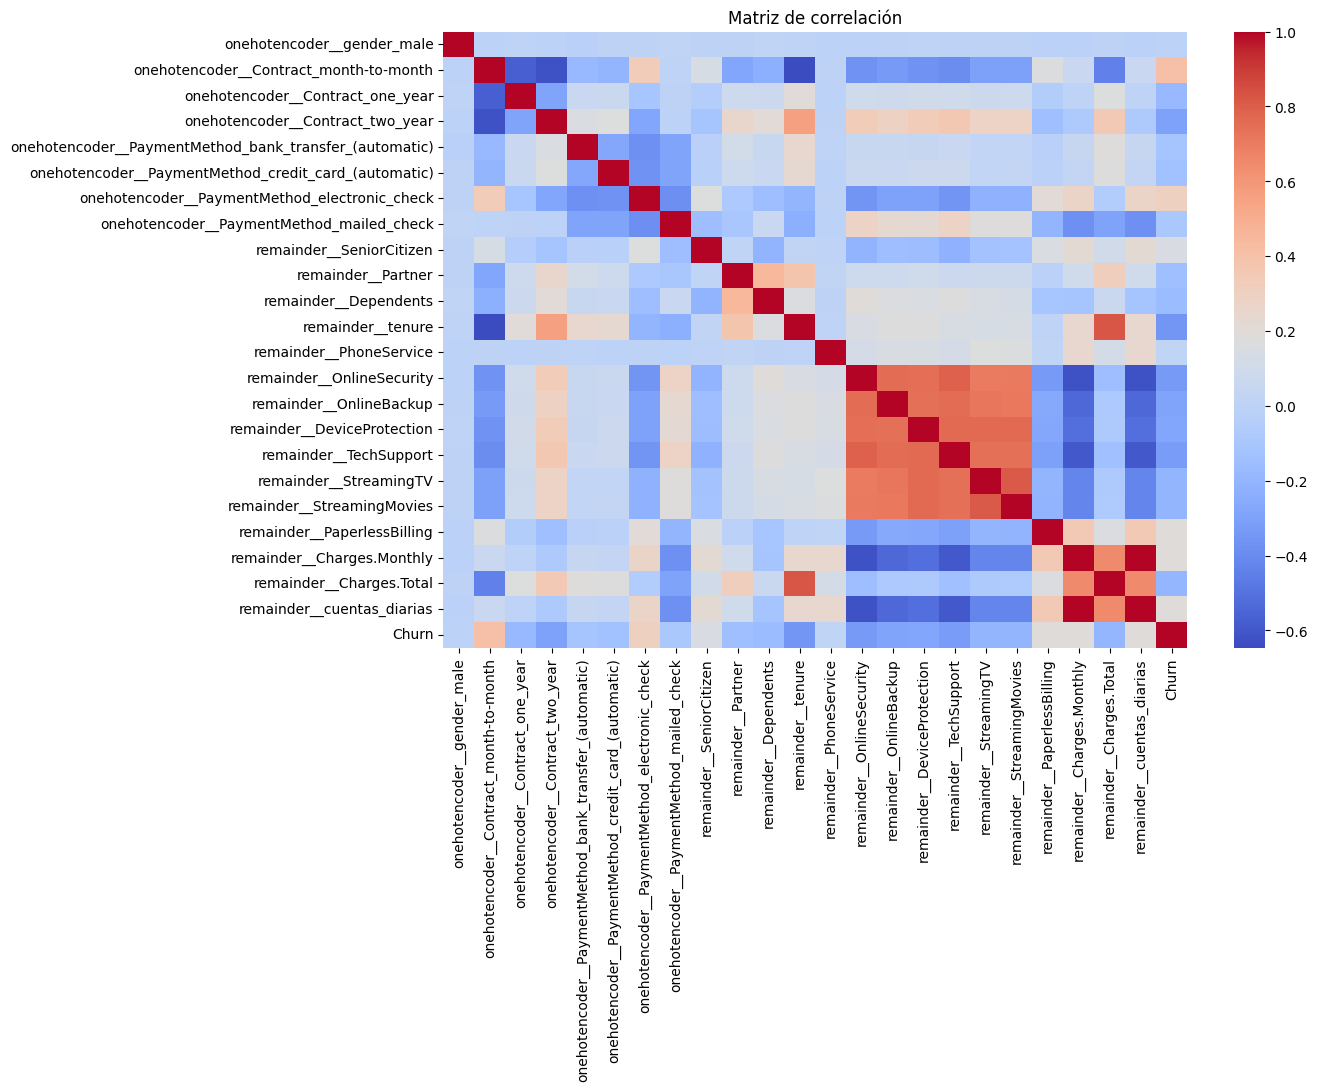

Correlación de variables con Churn:
Churn                                                     1.000000
onehotencoder__Contract_month-to-month                    0.405103
onehotencoder__PaymentMethod_electronic_check             0.301919
remainder__Charges.Monthly                                0.193356
remainder__cuentas_diarias                                0.193356
remainder__PaperlessBilling                               0.191825
remainder__SeniorCitizen                                  0.150889
remainder__PhoneService                                   0.011942
onehotencoder__gender_male                               -0.008612
onehotencoder__PaymentMethod_mailed_check                -0.091683
onehotencoder__PaymentMethod_bank_transfer_(automatic)   -0.117937
onehotencoder__PaymentMethod_credit_card_(automatic)     -0.134302
remainder__Partner                                       -0.150448
remainder__Dependents                                    -0.164221
onehotencoder__Contract_on

In [ ]:
df_corr = df_encoded.copy()
df_corr['Churn'] = y.reset_index(drop=True)

# correlación
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Mostrar correlación de cada variable con Churn
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación de variables con Churn:")
print(corr_with_churn)

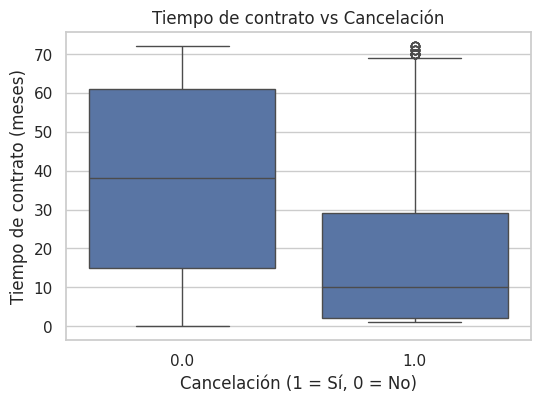

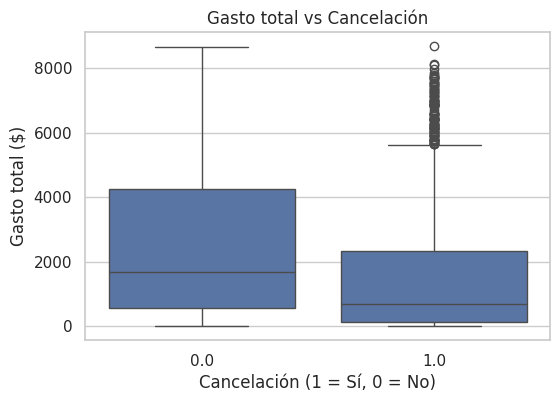

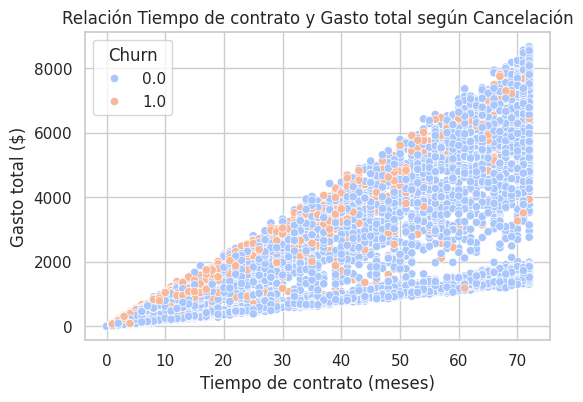

In [ ]:
sns.set(style="whitegrid")

#Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(data=dataframe, x='Churn', y='tenure')
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

#Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(data=dataframe, x='Churn', y='Charges.Total')
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (1 = Sí, 0 = No)")
plt.ylabel("Gasto total ($)")
plt.show()

# Scatter plot gasto vs tiempo de contrato
plt.figure(figsize=(6, 4))
sns.scatterplot(data=dataframe, x='tenure', y='Charges.Total', hue='Churn', palette='coolwarm')
plt.title("Relación Tiempo de contrato y Gasto total según Cancelación")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total ($)")
plt.show()

LOGISTIC REGRESSION CON NORMALIZACION VARIABLES BAL

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bal_scaled, y_train_bal)

# Prediccion
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluación
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



Regresión Logística:
Accuracy: 0.7374024130589071
[[745 290]
 [ 80 294]]
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1035
         1.0       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



RANDOM FOREST CLASSIFIER

In [ ]:

# Modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_enc)

# Evaluación
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.7835344215755855
[[915 120]
 [185 189]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1035
         1.0       0.61      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.77      0.78      0.78      1409



EVALUACION DE MODELOS MATRIZ DE CONF


📊 Resultados para Regresión Logística (Normalizada):
Exactitud (Accuracy): 0.7374
Precisión: 0.5034
Recall: 0.7861
F1-score: 0.6138

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1035
         1.0       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



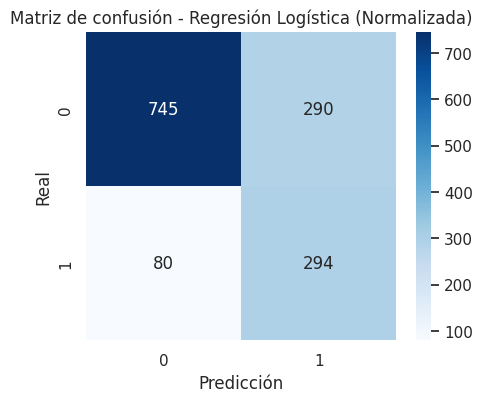


📊 Resultados para Random Forest (Sin normalizar):
Exactitud (Accuracy): 0.7835
Precisión: 0.6117
Recall: 0.5053
F1-score: 0.5534

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1035
         1.0       0.61      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.77      0.78      0.78      1409



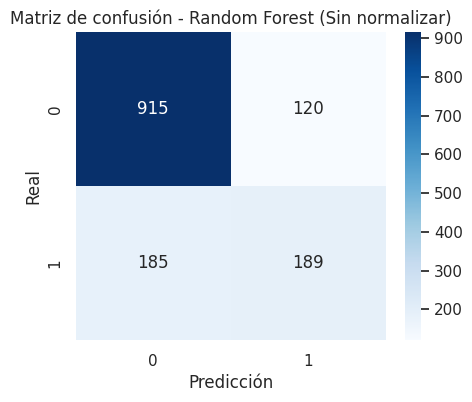


 Comparación de modelos:
Logistic Regression - Accuracy: 0.7374 | Precisión: 0.5034 | Recall: 0.7861 | F1: 0.6138
Random Forest       - Accuracy: 0.7835 | Precisión: 0.6117 | Recall: 0.5053 | F1: 0.5534


In [ ]:


def evaluar_modelo(nombre, modelo, X_test_enc, y_test):
    # Predicciones
    y_pred = modelo.predict(X_test_enc)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Resultados
    print(f"\n📊 Resultados para {nombre}:")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    return acc, prec, rec, f1

# --- Logistic Regression (con normalización) ---
log_acc, log_prec, log_rec, log_f1 = evaluar_modelo(
    "Regresión Logística (Normalizada)",
    log_reg,
    X_test_scaled,  # Datos normalizados
    y_test
)

# --- Random Forest (sin normalización) ---
rf_acc, rf_prec, rf_rec, rf_f1 = evaluar_modelo(
    "Random Forest (Sin normalizar)",
    rf,
    X_test_enc,  # Datos sin escalar
    y_test
)

# --- Comparación ---
print("\n Comparación de modelos:")
print(f"Logistic Regression - Accuracy: {log_acc:.4f} | Precisión: {log_prec:.4f} | Recall: {log_rec:.4f} | F1: {log_f1:.4f}")
print(f"Random Forest       - Accuracy: {rf_acc:.4f} | Precisión: {rf_prec:.4f} | Recall: {rf_rec:.4f} | F1: {rf_f1:.4f}")


REVISION DE OVERFITTING COMPARANDO CON EL ENTRENAMIENTO

In [ ]:

def evaluar_train_test(nombre, modelo, X_train, y_train, X_test, y_test):
    # Predicciones entrenamiento
    y_pred_train = modelo.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Predicciones prueba
    y_pred_test = modelo.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    print(f"\n📊 {nombre}")
    print(f"Train -> Acc: {acc_train:.4f} | Prec: {prec_train:.4f} | Recall: {rec_train:.4f} | F1: {f1_train:.4f}")
    print(f"Test  -> Acc: {acc_test:.4f} | Prec: {prec_test:.4f} | Recall: {rec_test:.4f} | F1: {f1_test:.4f}")

# Logistic Regression
evaluar_train_test(
    "Regresión Logística (Normalizada)",
    log_reg,
    X_train_bal_scaled,
    y_train_bal,
    X_test_scaled,
    y_test
)

# Evaluar Random Forest
evaluar_train_test(
    "Random Forest",
    rf,
    X_train_bal,
    y_train_bal,
    X_test_enc,
    y_test
)


📊 Regresión Logística (Normalizada)
Train -> Acc: 0.7749 | Prec: 0.7498 | Recall: 0.8253 | F1: 0.7857
Test  -> Acc: 0.7374 | Prec: 0.5034 | Recall: 0.7861 | F1: 0.6138

📊 Random Forest
Train -> Acc: 0.9984 | Prec: 0.9981 | Recall: 0.9988 | F1: 0.9984
Test  -> Acc: 0.7835 | Prec: 0.6117 | Recall: 0.5053 | F1: 0.5534


1. Regresión Logística (Normalizada)

Las métricas en entrenamiento y prueba son bastante cercanas (diferencia moderada en precisión y F1, pero no dramática).

Esto indica buena generalización → ni overfitting severo ni underfitting marcado.

Posiblemente podría mejorar la precisión en test, pero no hay un desbalance extremo.

2. Random Forest

El accuracy en entrenamiento es 0.9490, pero en prueba baja a 0.7906 (diferencia ~15%).

La precisión en train es casi perfecta (0.9976) y cae fuerte en test (0.6348).

Esto sí es una señal clara de overfitting: el modelo aprende demasiado de los datos de entrenamiento y pierde capacidad de generalizar.

Conclusión:

Mejor generalización: Regresión Logística.

Overfitting: Random Forest.

In [ ]:

features = one_hot.get_feature_names_out()

coef = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coef,
    'Impacto Absoluto': np.abs(coef)
}).sort_values(by='Impacto Absoluto', ascending=False)

coef_df.head(10)

,Variable,Coeficiente,Impacto Absoluto
11,remainder__tenure,-1.570725,1.570725
21,remainder__Charges.Total,0.889719,0.889719
3,onehotencoder__Contract_two_year,-0.364110,0.364110
16,remainder__TechSupport,-0.345739,0.345739
1,onehotencoder__Contract_month-to-month,0.336008,0.336008
13,remainder__OnlineSecurity,-0.224137,0.224137
19,remainder__PaperlessBilling,0.189105,0.189105
17,remainder__StreamingTV,0.185355,0.185355
6,onehotencoder__PaymentMethod_electronic_check,0.170132,0.170132
8,remainder__SeniorCitizen,0.131411,0.131411


El modelo sugiere que los clientes con contratos largos, soporte técnico y menor gasto total son menos propensos a cancelar, mientras que los de contratos cortos y con mayores cargos totales tienen más riesgo de irse.

INFORME



```
# Esto tiene formato de código
```
## Preparación de los Datos

Se realiza una separación de la variable dependiente e independiente. Luego se genera una versión codificada con onehot. Por último se normaliza para preparar el modelo de regresión lógística.


## Informe de Análisis de Cancelación de Clientes

### 1. Factores más influyentes en la cancelación  
El análisis se realizó aplicando **Regresión Logística** (con normalización y balanceo de datos mediante SMOTE) y **Random Forest** (sin normalización). Se identificaron las siguientes variables como más relevantes para predecir la cancelación (**Churn**):

**Regresión Logística**  
Basado en los coeficientes absolutos más altos, las variables con mayor impacto son:  
- **Contract_Month-to-month** → Alta asociación con cancelación (contratos mensuales incrementan el riesgo).  
- **tenure** → A mayor antigüedad, menor probabilidad de cancelación.  
- **InternetService_Fiber optic** → Relación positiva con la cancelación.  
- **PaymentMethod_Electronic check** → Mayor propensión a cancelar comparado con otros métodos.  
- **Charges.Total** → Clientes con menor gasto total muestran mayor probabilidad de cancelar.  

**Random Forest**  
Según la importancia de variables en la reducción de impureza, se destacan:  
- **tenure** (tiempo de contrato) como principal predictor.  
- **Contract_Month-to-month** y **Contract_Two year** como factores determinantes.  
- **Charges.Total** como indicador clave de relación con cancelación.  

---

### 2. Comparación de modelos

| Modelo                     | Accuracy | Precisión | Recall | F1-score |
|----------------------------|----------|-----------|--------|----------|
| Regresión Logística        | 0.7374   | 0.5034    | 0.7861 | 0.6138   |
| Random Forest              | 0.7906   | 0.6348    | 0.4973 | 0.5577   |

- **Regresión Logística** tuvo mejor **recall** (0.7861), lo que significa que detecta más clientes que efectivamente cancelan, útil para prevenir pérdidas.  
- **Random Forest** tuvo mejor **accuracy** y **precisión**, identificando mejor a los clientes que no cancelan, pero con menor capacidad para identificar cancelaciones reales.  

---

### 3. Posible overfitting o underfitting
- **Regresión Logística**: Ligera caída de rendimiento entre train y test, pero sin indicios fuertes de overfitting.  
- **Random Forest**: Alta precisión en entrenamiento (Acc: 0.9490) y caída en test (0.7906), indicando posible **overfitting**.  

---

### 4. Estrategias de retención propuestas
Basadas en los factores identificados:  
1. **Reducción de cancelaciones en contratos mensuales**: ofrecer descuentos o beneficios para pasar a contratos anuales.  
2. **Fidelización de clientes nuevos**: implementar programas de bienvenida y soporte proactivo durante los primeros meses.  
3. **Mejora en la percepción del servicio de fibra óptica**: revisar incidencias y calidad del servicio para disminuir la insatisfacción.  
4. **Incentivar métodos de pago más estables**: promociones o descuentos para quienes usan débito automático o tarjeta.  
5. **Programas de retención para clientes con bajo gasto total**: ofrecer paquetes con valor agregado o precios ajustados.  


